# Módulo 1: Extracción de datos
## -- Shapefiles --

### Objetivo
* Entender qué contiene un SHP así como conceptos básicos de estos archivos.
    * Aprender la importancia de los CRS y cómo ésto nos puede ayudar a cuadrar mapas.
* Visualizar mapas a partir de una serie de puntos, líneas y polígonos.
* Graficar características del AMG (Área Metropolitana de Guadalajara).




### Actividades
#### Actividad de clase
* A partir de los archivos provistos de tren ligero del AMG y caminos, dibuje las líneas del tren así como el de los caminos del estado (gráficos separados).


#### Actividad de tarea 
* Tome el archivo de colonias, lea y grafique coloreando por municipio. 
    * El object type es `colonias`, estos files no tienen subcarpetas como los del tren.
* Sobre el archivo de colonias agregue lo ya hecho de líneas del tren ligero. 
    * El objetivo de este punto es replicar la gráfica que ya existe de estaciones con nombres MÁS el plot de colonias. 
    * Para que te sea más fácil pregúntate, ¿necesitas modificar algo del `for` para que esto funcione? Solo ten cuidado con que todo tenga el mismo `CRS` (El `CRS` indicado a utilizar es el `"EPSG:4326"`)
    * Recuerda que para modificar el `CRS` de algo que ya sea un mapa (o sea que ya cuente con un `CRS`) debes usar el `to_crs`. 


Una excelente referencia: https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/




Los archivos shapefile albergan vectores de información geoespacial generalmente utilizado en GIS (Geographic Information System).

## Tipos de información 
* Puntos: Coordenadas x,y.
* Líneas: Conexiones de 2+ puntos.
* Polígonos: 3+ puntos que se conectan **y se cierran**.

## Estructura
* `.shp`: Contiene geometría para todos los features.
* `.shx`: Contiene los índices para toda la geometría. 
* `.dbf`: Guarda metadatos en forma tabular. 

## Metadata espacial


Los metadatos son _los datos de los datos_. Si yo descargo un archivo .csv, el peso del archivo es un metadato.

* `CRS`: Proyección de la data. Coordinate Reference System. Nos ayuda a proyectar una serie de coordenadas de manera que tengan sentido en un mapa. Ver: https://geopandas.org/projections.html
* `Extent`: Espacio geográfico que cubre todos los objetos dentro del archivo shapefile.

## Creando puntos, líneas y polígonos
Importante antes contar con la paquetería `shapely`,  `geopandas` y `descartes` instaladas.

In [8]:
# Importamos los 3 objetos básicos
from shapely.geometry import Point, Polygon, LineString


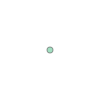

In [9]:
# Definiendo un punto
point1 = Point(0, 1)
point1

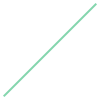

In [10]:
# Definiendo una línea
point1 = [0, 1]
point2 = [2, 3]

# Línea
linea = LineString([point1, point2])
linea

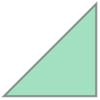

In [11]:
# Definiendo un polígono
point1 = [0, 0]
point2 = [1, 0]
point3 = [1, 1]

puntos_juntos = [point1, point2, point3]
poligono = Polygon(puntos_juntos)
poligono

## Leyendo shapefiles (.shp) 
### Actividad de clase: 
* A partir de los archivos provistos de tren ligero del AMG y caminos, dibuje las líneas del tren así como el de los caminos del estado (gráficos separados). 

In [12]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [13]:
# supdir =  Reemplaza con el directorio donde vayas a trabajar. Aquí debe de estar un subdirectorio llamado "tren-ligero"
supdir = '.'

In [14]:
basedir = os.path.join(supdir, 'tren-ligero', 'tren_ligero-gdl')
basedir

directorio = os.path.join(basedir, 'lineas', 'c_tren_l1.shp')
mi_shp = gpd.read_file(directorio)
mi_shp

,OID_,Name,FolderPath,geometry
0,0,Línea 1,SiteurLínea 1,"LINESTRING Z (666639.364 2279504.599 0, 667183..."


Dada la forma en la que tenemos organizada la información (carpetas), crearemos una función para leer. El ejemplo es de las líneas del tren ligero. 

In [15]:
def get_shp_files(basedir, object_type, file_type='.shp'):
    """ Lectura de archivos SHP anidados
    
    Este método nos permitirá leer archivos SHP que se encuetran en subcarpetas.
    
    Parámetros
    
    basedir: Directorio base en el cual se encuentran nuestras subcarpetas con archivos shp.
    object_type: Tipo de mapa a leer (las carpetas que descargamos traen muchos tipos dentro).
    file_type: Constante para solo leer archivos .shp
    """
    # Empezamos con el código diciéndonos qué rayos está leyendo
    print(f'--> Initiating with {file_type} file reading over {object_type} type of files.')
    
    # Juntamos el directorio original con el tipo de mapa a leer.
    final_dir = os.path.join(basedir, object_type)
    
    # Juntando todos los archivos del directorio
    existing_files = os.listdir(final_dir)
    
    # Variable respuesta, aquí tendremos todos los archivos
    returning_files = {}
    
    # Recorriendo archivo por archivo
    for existing_file in existing_files:

        # Condicional: ¿El archivo en cuestión es de los que nos interesan?
        if file_type in existing_file:

            # En efecto lo es, quítale la extensión ".shp"
            file_name = existing_file.strip(file_type)
            
            print(f'--> Found file {file_type}: {file_name}.')
                                            
            # Nuevo path: El específico para el archivo shp
            path_to_specific_file = os.path.join(final_dir, existing_file)
            
            # Leyéndolo con geopandas
            returning_files[file_name] = gpd.read_file(path_to_specific_file)
    
    # Listo
    print(f'Done with file seek over {object_type}.')
    return returning_files

In [16]:
# Pongamos a prueba la función.


# Leyendo el mapa de líneas del tren ligero
lineas = get_shp_files(basedir=basedir,object_type='lineas')

# Leyendo el mapa de estaciones del tren ligero
estaciones = get_shp_files(basedir=basedir,object_type='estaciones')

--> Initiating with .shp file reading over lineas type of files.
--> Found file .shp: c_tren_l1.
--> Found file .shp: c_tren_l2.
--> Found file .shp: c_tren_l3.
Done with file seek over lineas.
--> Initiating with .shp file reading over estaciones type of files.
--> Found file .shp: c_est_tren_l1.
--> Found file .shp: c_est_tren_l2.
--> Found file .shp: c_est_tren_l3.
Done with file seek over estaciones.


In [17]:
# Veamos qué tenemos
lineas

{'c_tren_l1':    OID_     Name     FolderPath  \
 0     0  Línea 1  SiteurLínea 1   
 
                                             geometry  
 0  LINESTRING Z (666639.364 2279504.599 0, 667183...  ,
 'c_tren_l2':    OID_     Name     FolderPath  \
 0     0  Línea 2  SiteurLínea 2   
 
                                             geometry  
 0  LINESTRING Z (671374.781 2287038.455 0, 671760...  ,
 'c_tren_l3':    Id             NOMBRE    ESTATUS   AÑO              Nombre1  \
 0   0  TRANSPORTE MASIVO  PROPUESTO  2015  Línea 3 Tren Ligero   
 
                Fuente                                           geometry  
 0  SEMOV, SITEUR 2015  LINESTRING (665029.941 2294916.802, 666220.569...  }

Parece que tenemos un ligero cochinero, pero accedamos al mismo archivo que leímos hace rato: 

In [18]:
# Línea 1
lineas['c_tren_l1']

,OID_,Name,FolderPath,geometry
0,0,Línea 1,SiteurLínea 1,"LINESTRING Z (666639.364 2279504.599 0, 667183..."


In [19]:
# Línea 2
lineas['c_tren_l2']

,OID_,Name,FolderPath,geometry
0,0,Línea 2,SiteurLínea 2,"LINESTRING Z (671374.781 2287038.455 0, 671760..."


In [20]:
# Ojo con como vienen los metadatos de la línea 3
lineas['c_tren_l3']

,Id,NOMBRE,ESTATUS,AÑO,Nombre1,Fuente,geometry
0,0,TRANSPORTE MASIVO,PROPUESTO,2015,Línea 3 Tren Ligero,"SEMOV, SITEUR 2015","LINESTRING (665029.941 2294916.802, 666220.569..."


Es exactamente lo mismo, solo nos ayudamos de la función para tener todo más organizado. 

Sabemos que tenemos un diccionario de la forma:

```
dict = {nombre_archivo: geopandas con coordenadas}
```

Grafiquemos un solo set usando `geopandas`: 

In [21]:
# Viendo como acceder a estaciones
print(estaciones.keys())
# ¿Cómo se ven las estaciones?
estaciones['c_est_tren_l1']

dict_keys = (['c_est_tren_l1', 'c_est_tren_l2','c_est_tren_l1'])

dict_keys(['c_est_tren_l1', 'c_est_tren_l2', 'c_est_tren_l3'])


In [22]:
# Graficando estaciones línea 1
estaciones_l1= estaciones['c_est_tren_l1']
linea1 = lineas['c_tren_l1']

estaciones_l1.crs

<Projected CRS: EPSG:32613>
Name: WGS 84 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 108°W and 102°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-108.0, 0.0, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Notamos que el CRS está raro (el estándar es 4326)

In [23]:
# Setteando CRS a algo típico
estaciones_l1 = estaciones_l1.to_crs('EPSG:4326')
linea1 = linea1.to_crs('EPSG:4326')

estaciones_l1

,Id,NOMBRE,Detalle,geometry
0,0,ESTACION PERIFERICO SUR,Superficie,POINT (-103.40073 20.60719)
1,0,ESTACION SANTUARIO MARTIRES DE CRISTO REY,Superficie,POINT (-103.39559 20.61375)
2,0,ESTACION ESPAÑA,Superficie,POINT (-103.38936 20.62142)
3,0,ESTACION PATRIA,Superficie,POINT (-103.38492 20.62674)
4,0,ESTACION ISLA RAZA,Superficie,POINT (-103.38054 20.63275)
5,0,ESTACION 18 DE MARZO,Superficie,POINT (-103.37689 20.63814)
6,0,ESTACION URDANETA,Superficie,POINT (-103.37272 20.64311)
7,0,ESTACION UNIDAD DEPORTIVA,Superficie,POINT (-103.3691 20.64736)
8,0,ESTACION SANTA FILOMENA,Superficie,POINT (-103.36366 20.65423)
9,0,ESTACION WASHINGTON,Subterranea,POINT (-103.35744 20.66104)


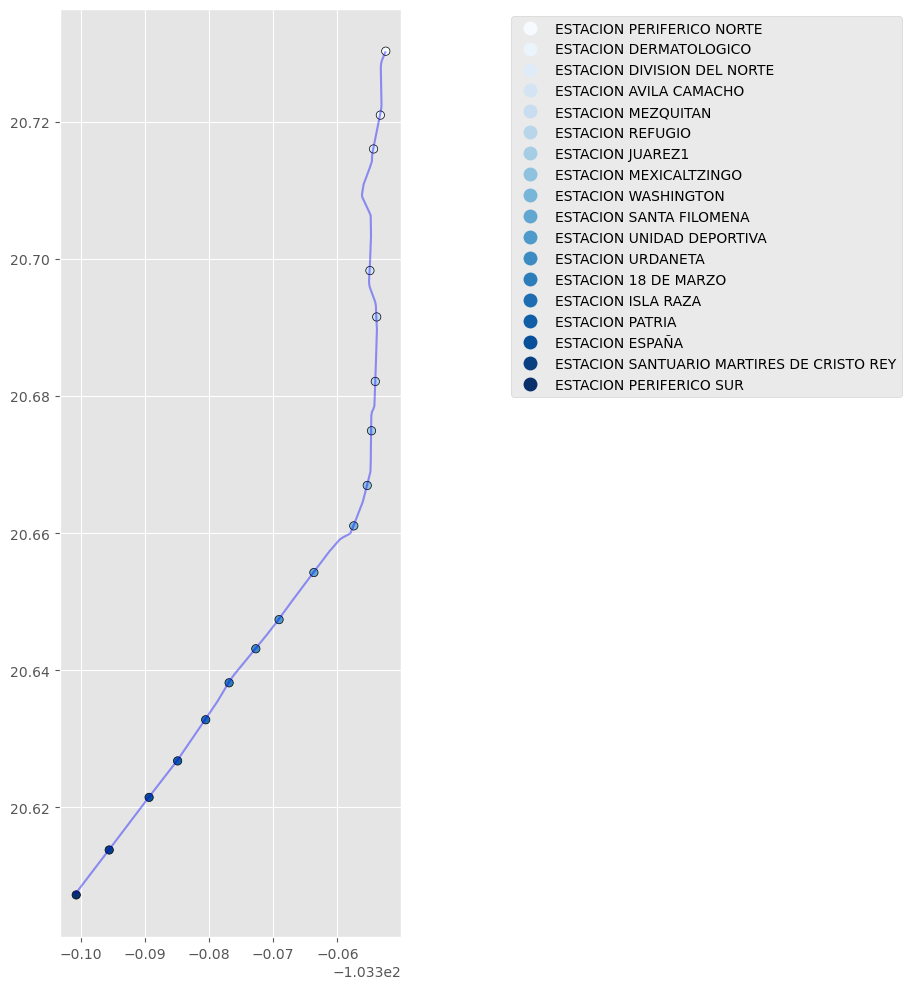

In [24]:
# Ahora sí grafiquemos
fig, ax = plt.subplots(figsize=(20, 10))

linea1.plot(color='blue', ax=ax ,alpha=0.4)

nombre_estaciones = estaciones_l1['NOMBRE'].sort_index(ascending=False).tolist()

estaciones_l1.plot(
    categorical=True,
    column='NOMBRE',
    categories=nombre_estaciones,
    cmap='Blues',
    edgecolor='black',
    legend_kwds={'bbox_to_anchor': (1.3, 1)},
    legend=True,
    ax=ax
)

fig.tight_layout()
plt.show()

¿Qué tal si de una graficamos todo? 

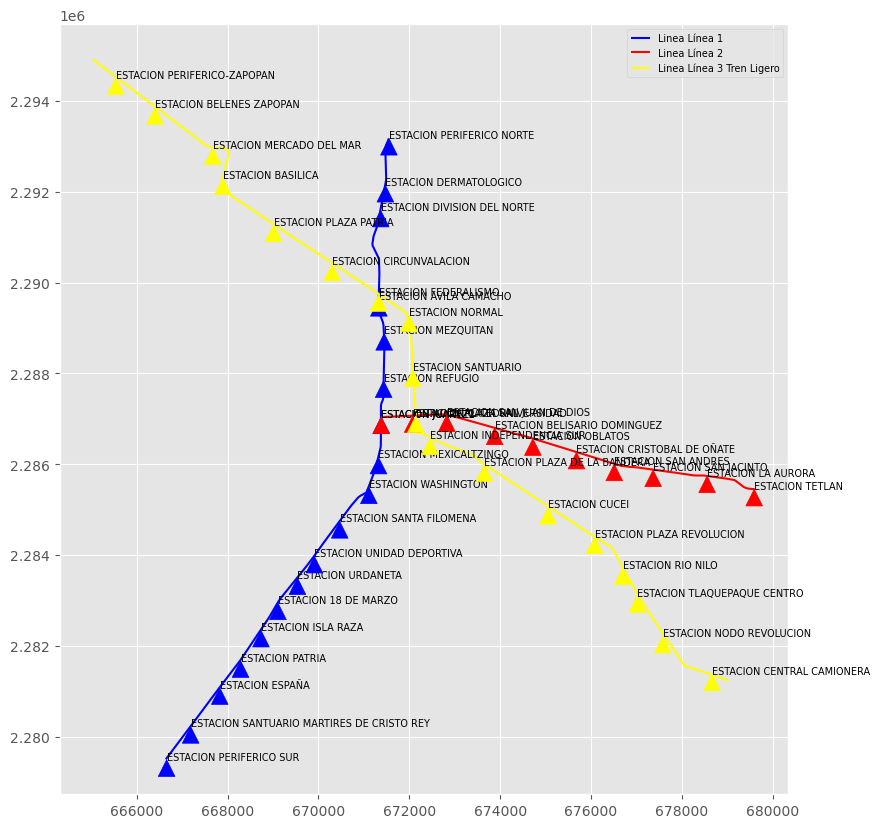

In [25]:
# Definiendo el espacio de graficado
fig, ax = plt.subplots(figsize=(30, 10))

# Constante para la fuente
fontsize = 7

# Diccionario de colores: Uno para cada línea
colors = {0: 'blue', 1: 'red', 2: 'yellow'}

for index in range(len(lineas)):
    linea_key = list(lineas.keys())[index]

    estacion_key = list(estaciones.keys())[index]

    if 'NOMBRE' in lineas[linea_key].columns:
        linea_col= 'Nombre1'
    else:
        linea_col = 'Name'

    if 'NOMBRE' in estaciones[estacion_key].columns:
        estacion_col = 'NOMBRE'
    else:
        estacion_col = 'Name'

    linea_name = lineas[linea_key][linea_col].iloc[0]
    
    lineas[linea_key].plot(ax=ax, color=colors[index], label=f'Linea {linea_name}')

    points = estaciones[estacion_key].apply(
        lambda x: [y for y in x['geometry'].coords[0]], axis=1
    )
    for point_idx, point in enumerate(points):
        angle = 0
    
        x, y = point[0], point[1]
    
        estacion_name = estaciones[estacion_key].loc[point_idx, estacion_col]
    
        estacion_name.split('ESTACION ')[1].strip()
    
        ax.annotate(estacion_name,
                    (x, y),
                    fontsize=fontsize,
                    rotation=angle, 
                    arrowprops=dict(color=colors[index])
                    )
ax.legend(fontsize=fontsize)
plt.show()

In [26]:
lineas[linea_key][linea_col].iloc[0]
'Linea 3 Tren Ligero'

'Linea 3 Tren Ligero'

## Leyendo shapefiles (.shp) : Caminos en el AMG (2012) 

In [27]:
# Reciclamos la función, ahora para caminos
caminos = get_shp_files(supdir, 'camino_2012')
caminos['Camino_2012']

--> Initiating with .shp file reading over camino_2012 type of files.
--> Found file .shp: Camino_2012.
Done with file seek over camino_2012.


,ADMINISTRA,POSICION,CONDICION,DESTINO,FECHA,FUENTE,ID,ORIGEN,RECUBRIMIE,TIPO,TIPOIITEJ,LONG_KM,OID,geometry
0,Estatal,Definida,En operación,El Saucillo,20060821,IITEJ,1,Entr. Carr. Mex. 080,Empedrado,Terracería,Terracería empedrada,0.472213,1,"LINESTRING (613930.69 2246513.16, 613929.988 2..."
1,Municipal,Definida,En operación,Cañada de Tejas,20090128,IITEJ,2,Camino a El Llano Grande,Revestido,Terracería,Terracería revestida,6.902677,2,"LINESTRING (489007.738 2189896.228, 489006.918..."
2,Municipal,Definida,En operación,Cañada de Tejas,20090128,IITEJ,3,Camino a El Llano Grande,Revestido,Terracería,Terracería revestida,4.832039,3,"LINESTRING (493065.063 2191246.808, 493061.885..."
3,Municipal,Definida,En operación,Cañada de Tejas,20090128,IITEJ,4,Camino a El Llano Grande,Revestido,Terracería,Terracería revestida,0.998243,4,"LINESTRING (496690.797 2196117.058, 496686.087..."
4,Estatal,Definida,En operación,Llano Grande,20040615,SEDER,5,Tomatlán,Revestido,Terracería,Terracería revestida,9.764455,5,"LINESTRING (496690.797 2196117.058, 496693.647..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9223,Estatal,Definida,En operación,El Tepame,20050222,SEDER,9224,Entr. Carr. 304,Empedrado,Terracería,Terracería empedrada,0.064273,9224,"LINESTRING (795728.949 2326581.776, 795736.18 ..."
9224,Estatal,Definida,En operación,El Terrero Chico,20040730,IITEJ,9225,Entr. Carr. 314 - San Ignacio Cerro Gordo,Empedrado,Terracería,Terracería empedrada,0.107324,9225,"LINESTRING (757343.808 2296218.486, 757352.946..."
9225,Particular,Definida,En operación,Santuario de La Madre Naty,20120802,IITEJ,9226,Carretera a Tecomatlan,Sin revestimiento,Brecha,Brecha,0.889718,9226,"LINESTRING (716061.785 2281947.969, 716065.346..."
9226,Municipal,Definida,En operación,Cuescomatitlan,20120806,IITEJ,9227,Carr a la Calera,Revestido,Terracería,Terracería revestida,1.407314,9227,"LINESTRING (674042.286 2265870.73, 674031.66 2..."


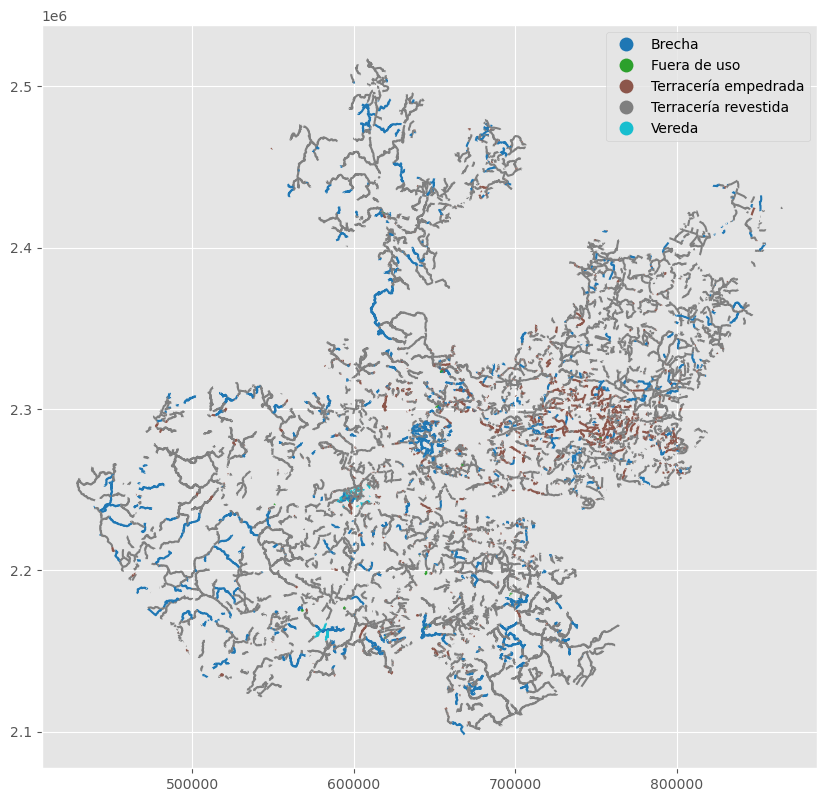

In [28]:
# Gráfica simple para esta magia
fig, ax = plt.subplots(figsize=(10, 10))

caminos['Camino_2012'].plot(
    categorical=True,
    column='TIPOIITEJ',
    legend=True,
    ax=ax
)
plt.show()


### Actividad autónoma
* Tome el archivo de colonias, lea y grafique coloreando por municipio. 
    * El object type es `colonias`, estos files no tienen subcarpetas como los del tren.
* Sobre el archivo de colonias agregue lo ya hecho de líneas del tren ligero. 
    * El objetivo de este punto es replicar la gráfica que ya existe de estaciones con nombres MÁS el plot de colonias. 
    * Para que te sea más fácil pregúntate, ¿necesitas modificar algo del `for` para que esto funcione? Solo ten cuidado con que todo tenga el mismo `CRS` (El `CRS` indicado a utilizar es el `"EPSG:4326"`)
    * Recuerda que para modificar el `CRS` de algo que ya sea un mapa (o sea que ya cuente con un `CRS`) debes usar el `to_crs`. 



In [29]:
import geopandas as gpd

# Cargar los archivos
colonias = gpd.read_file("colonias/Colonias.shp")

print("Información de las Colonias:")
print(colonias.info())  # Muestra las columnas y tipos de datos
print("\nPrimeras filas del archivo de Colonias:")
print(colonias.head())  # Muestra las primeras filas

Información de las Colonias:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CP_COLONIA  1150 non-null   float64 
 1   MUNICIPIO   1150 non-null   object  
 2   COLONIA     1150 non-null   object  
 3   geometry    1150 non-null   geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 36.1+ KB
None

Primeras filas del archivo de Colonias:
   CP_COLONIA    MUNICIPIO              COLONIA  \
0         0.0  TLAQUEPAQUE     MIRADOR EL ALAMO   
1         0.0  TLAQUEPAQUE             SAN JUAN   
2         0.0       TONALA   LOMAS DEL CAMICHIN   
3         0.0       TONALA  LOMAS DE LA SOLEDAD   
4         0.0       TONALA  LOMAS DEL MANANTIAL   

                                            geometry  
0  POLYGON ((674657.966 2281812.001, 674792.992 2...  
1  POLYGON ((681746.844 2277432.748, 681666.8 227...  
2  POLYGON ((679310.5

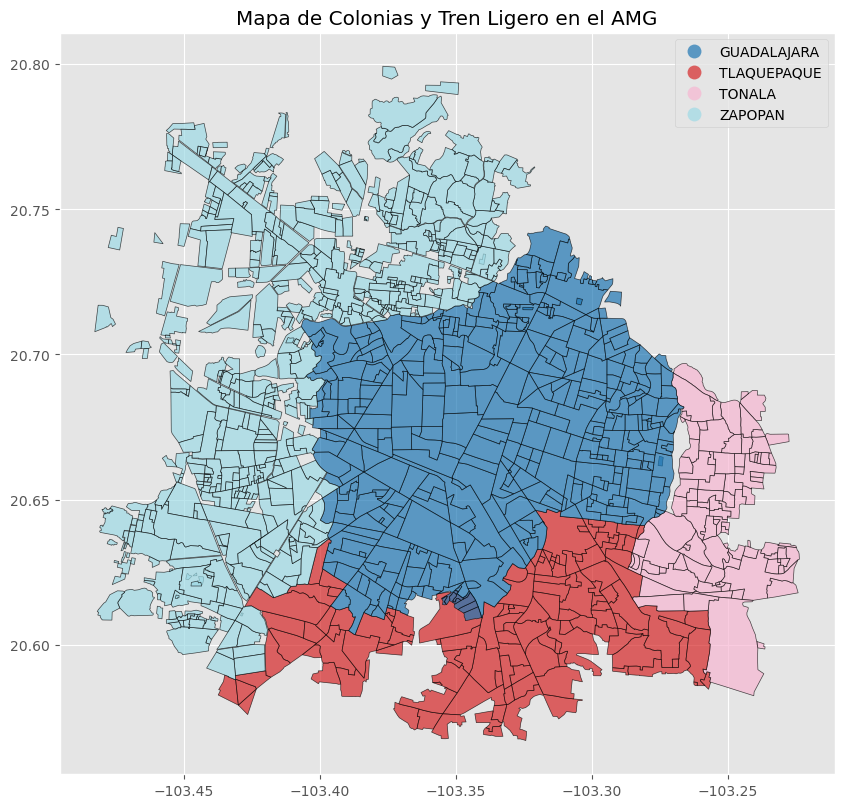

In [32]:
colonias = gpd.read_file("colonias/Colonias.shp")
colonias = colonias.to_crs("EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 10))
colonias.plot(column="MUNICIPIO", cmap="tab20", legend=True, ax=ax, edgecolor="black", alpha=0.7)

ax.set_title("Mapa de Colonias y Tren Ligero en el AMG")
plt.show()

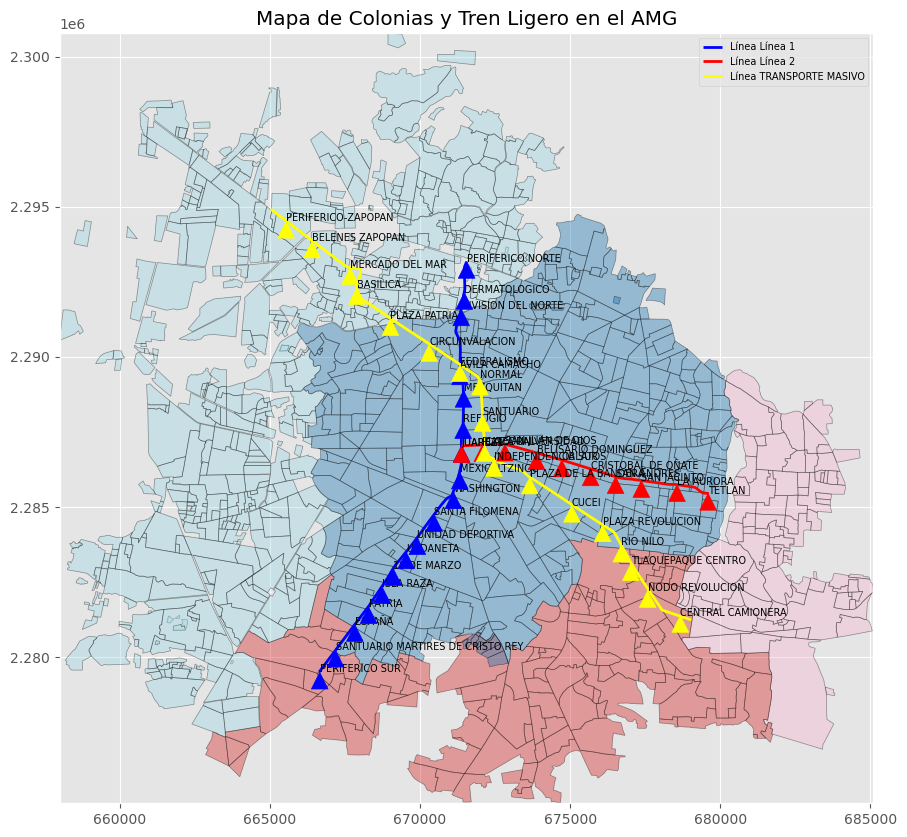

In [42]:
if colonias.crs != lineas[list(lineas.keys())[0]].crs:
    colonias = colonias.to_crs(lineas[list(lineas.keys())[0]].crs)


fig, ax = plt.subplots(figsize=(15, 10))
colonias.plot(column="MUNICIPIO", cmap="tab20", legend=True, ax=ax, edgecolor="black", alpha=0.4)

colors = {0: 'blue', 1: 'red', 2: 'yellow'}

for index in range(len(lineas)):
    linea_key = list(lineas.keys())[index]
    estacion_key = list(estaciones.keys())[index]

    if 'NOMBRE' in lineas[linea_key].columns:
        linea_col = 'NOMBRE'
    else:
        linea_col = 'Name'

    if 'NOMBRE' in estaciones[estacion_key].columns:
        estacion_col = 'NOMBRE'
    else:
        estacion_col = 'Name'

    linea_name = lineas[linea_key][linea_col].iloc[0]
    lineas[linea_key].plot(ax=ax, color=colors[index], label=f'Línea {linea_name}', linewidth=2)

    points = estaciones[estacion_key].apply(
        lambda x: [y for y in x['geometry'].coords[0]], axis=1
    )

    for point_idx, point in enumerate(points):
        angle = 0
        x, y = point[0], point[1]
        estacion_name = estaciones[estacion_key].loc[point_idx, estacion_col]

        estacion_name = estacion_name.split('ESTACION ')[-1].strip()

        ax.annotate(
            estacion_name,
            (x, y),
            fontsize=7,
            rotation=angle,
            arrowprops=dict(color=colors[index])
        )

# Ajuste de escala
ax.set_xlim(colonias.total_bounds[0], colonias.total_bounds[2])
ax.set_ylim(colonias.total_bounds[1], colonias.total_bounds[3])

ax.legend(fontsize=7)
ax.set_title("Mapa de Colonias y Tren Ligero en el AMG")

plt.show()


Responder con tus palabras:
    ¿Qué pasaría si tenemos un CRS diferente en dos datasets que estemos usando de manera simultánea?
        Las ubicaciones en el espacio no coincidirán correctamente al graficarlos, no se van a solapar y podría haber problemas con la escala. Bajo un análisis, habría serios errores en distancias, áreas o intersecciones.
    ¿Por qué tenemos que estandarizar un CRS?
        Para que los datos puedan mostrarse en la misma escala, pues al compartir sistema de coordenadas no debería haber problema al graficar.
    Si no estandarizo un CRS pero todos mis conjuntos de datos tienen el mismo CRS, ¿tengo un problema? ¿por qué?
        No necesariamente, pueden solaparse sin mucho problema porque la escala ya es la misma para todas las coordenadas.

## Preguntas sobre CRS y su importancia  

### ¿Qué pasaría si tenemos un CRS diferente en dos datasets que estemos usando de manera simultánea?  
Las ubicaciones en el espacio no coincidirán correctamente al graficarlos, no se van a solapar y podría haber problemas con la escala. Bajo un análisis, habría serios errores en distancias, áreas o intersecciones.

### ¿Por qué tenemos que estandarizar un CRS?  
Para que los datos puedan mostrarse en la misma escala, pues al compartir sistema de coordenadas no debería haber problema al graficar.  

### Si no estandarizo un CRS pero todos mis conjuntos de datos tienen el mismo CRS, ¿tengo un problema? ¿Por qué?  
No necesariamente, pueden solaparse sin mucho problema porque la escala ya es la misma para todas las coordenadas. Aún así es recomendable estandarizar los datos durante la limpieza.